# Setting up GPU-enabled

In [2]:
# Setting GPU-enabled Tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

# Import Packages

In [5]:
import os
import re
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

# Check available GPU Devices

In [6]:
# Check available GPU devices.
print("The following GPU devices are available: %s" % tf.config.experimental.list_physical_devices("GPU"))
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

The following GPU devices are available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs Available:  1


# Load Dataset

In [4]:
dataset =os.path.join(os.getcwd(),r"Dataset")
# mask_dataset_path = os.path.join(os.getcwd(),r"Dataset\correct_mask")
# wo_mask_dataset_path = os.path.join(os.getcwd(),r"Dataset\incorrect_mask")

# Data-Preprocessing and Creating Model using MobileNetV2

In [5]:
# Dataset in the folder address
# dfolder is the "correct" and "incorrect"
# subfolder is 01000, 02000, 03000 etc..
images  = []
labels = []
i=0
for dfolder in os.listdir(dataset):
    dfolder = os.path.join(dataset,dfolder)
    for subfolder in os.listdir(dfolder):
        path = os.path.join(dfolder,subfolder)
#         print(i) # uncomment this to check num of folders involved
        for img in os.listdir(path):
            img_path = os.path.join(path,img)
            img_label = img_path.split(os.path.sep)[-3]
#             print(img_label,img_path) # uncomment this to check the image_label and image path
            
            # load the images, Preprocess the images and appending them 
            image = load_img(img_path, target_size=(224, 224))
            image = img_to_array(image)
            image = preprocess_input(image)
            
            images.append(image)
            labels.append(img_label)
        i+=1

0
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00000_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00001_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00002_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00003_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00004_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00005_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00006_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00007_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00008_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00009_Mask.jpg
correct_mask C:\Users\User\C

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00096_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00097_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00098_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00099_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00100_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00101_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00102_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00103_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00104_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00105_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00193_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00194_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00195_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00196_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00197_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00198_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00199_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00200_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00201_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00202_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00282_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00283_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00284_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00285_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00286_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00287_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00288_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00289_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00290_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00292_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00376_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00377_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00378_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00379_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00380_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00381_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00382_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00383_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00384_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00386_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00470_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00471_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00472_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00473_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00474_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00475_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00476_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00477_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00478_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00479_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00563_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00564_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00565_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00566_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00567_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00568_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00569_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00570_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00571_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00572_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00658_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00659_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00661_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00662_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00663_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00664_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00665_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00666_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00667_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00668_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00758_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00759_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00760_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00761_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00762_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00764_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00765_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00766_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00767_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00768_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00860_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00861_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00862_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00863_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00864_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00865_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00866_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00867_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00868_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00869_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00959_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00960_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00961_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00963_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00964_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00965_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00966_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00967_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00968_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\00000\00969_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01053_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01054_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01055_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01056_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01057_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01058_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01059_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01060_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01061_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01062_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01143_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01144_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01145_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01146_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01147_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01148_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01149_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01150_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01151_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01152_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01246_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01247_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01248_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01249_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01250_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01252_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01253_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01254_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01255_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01257_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01337_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01338_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01339_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01340_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01341_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01342_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01343_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01344_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01345_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01346_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01431_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01432_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01433_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01434_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01435_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01436_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01437_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01438_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01439_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01440_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01518_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01519_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01520_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01521_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01522_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01523_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01524_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01525_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01526_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01527_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01611_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01612_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01613_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01614_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01615_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01616_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01617_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01618_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01619_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01620_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01715_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01716_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01717_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01718_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01719_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01720_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01722_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01723_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01725_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01726_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01805_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01806_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01807_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01808_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01809_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01810_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01811_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01812_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01813_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01814_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01905_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01906_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01907_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01908_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01909_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01910_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01911_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01912_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01913_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01914_Mask.jpg
correct_mask C:\Users\User\Cod

correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01993_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01994_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01995_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01996_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01997_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01998_Mask.jpg
correct_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\correct_mask\01000\01999_Mask.jpg
2
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00000_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00001_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00001_Mask_Mout

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00082_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00083_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00084_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00085_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00086_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00087_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00089_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00090_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00092_Mask_Mouth_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00175_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00176_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00177_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00178_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00179_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00180_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00181_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00182_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00183_Mask_Mouth_C

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00266_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00267_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00269_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00270_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00271_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00273_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00274_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00275_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00276_Mask_Mouth_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00356_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00357_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00358_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00360_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00361_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00362_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00363_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00364_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00365_Mask_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00444_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00445_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00446_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00447_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00448_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00450_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00451_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00452_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00453_Mask_Mouth_Chin.jpg
inco

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00530_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00531_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00532_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00533_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00534_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00535_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00536_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00537_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00538_Mask_Mouth_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00615_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00616_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00617_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00618_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00619_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00620_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00621_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00622_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00623_Mask_Mouth_Chin.jpg
inco

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00701_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00702_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00703_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00704_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00705_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00706_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00707_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00708_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00710_Mask_Mouth_C

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00782_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00783_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00784_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00785_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00786_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00787_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00788_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00789_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00790_Mask_Mouth_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00865_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00866_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00867_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00868_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00869_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00870_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00871_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00872_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00873_Mask_Nose_Mouth.jpg
inco

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00957_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00958_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00959_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00961_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00962_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00963_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00964_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00965_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\00000\00966_Mask_Mouth_C

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01043_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01044_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01045_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01046_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01047_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01048_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01049_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01050_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01051_Mask_Mouth_C

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01131_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01132_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01133_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01134_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01135_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01136_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01137_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01138_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01139_Mask_Mouth_Chin.jpg
inco

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01211_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01212_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01213_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01214_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01215_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01216_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01217_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01218_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01219_Mask_Mouth_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01294_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01296_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01297_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01298_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01299_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01300_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01301_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01302_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01303_Mask_Mouth_C

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01373_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01375_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01376_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01377_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01378_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01379_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01380_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01381_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01383_Mask_Mouth_C

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01465_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01466_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01467_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01468_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01469_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01470_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01471_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01472_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01473_Mask_Mouth_C

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01543_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01544_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01545_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01546_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01547_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01548_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01549_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01550_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01551_Mask_Mouth_C

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01624_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01625_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01626_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01627_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01628_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01629_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01630_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01631_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01632_Mask_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01707_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01709_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01710_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01711_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01712_Mask_Nose_Mouth.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01713_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01714_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01715_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01716_Mask_Mouth_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01792_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01793_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01794_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01795_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01796_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01797_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01798_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01799_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01800_Mask_Mouth_Chin.jpg
incorrect_

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01876_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01877_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01878_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01879_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01880_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01881_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01882_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01883_Mask_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01884_Mask_Mouth_Chin.jp

incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01954_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01955_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01956_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01958_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01959_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01960_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01961_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01962_Mask_Mouth_Chin.jpg
incorrect_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\incorrect_mask\01000\01963_Mask_Mouth_C

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00039.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00040.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00041.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00042.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00043.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00044.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00045.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00046.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00047.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00048.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00049.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00050.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00141.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00142.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00143.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00144.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00145.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00146.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00147.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00148.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00149.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00150.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00151.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00152.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00242.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00243.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00244.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00245.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00246.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00247.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00248.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00249.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00250.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00251.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00252.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00253.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00343.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00344.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00345.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00346.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00347.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00348.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00349.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00350.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00351.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00352.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00353.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00354.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00446.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00447.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00448.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00449.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00450.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00451.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00452.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00453.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00454.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00455.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00456.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00457.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00548.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00549.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00550.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00551.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00552.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00553.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00554.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00555.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00556.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00557.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00558.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00559.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00649.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00650.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00651.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00652.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00653.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00654.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00655.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00656.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00657.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00658.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00659.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00660.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00752.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00753.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00754.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00755.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00756.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00757.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00758.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00759.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00760.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00761.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00762.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00763.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00853.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00854.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00855.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00856.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00857.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00858.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00859.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00860.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00861.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00862.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00863.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00864.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00953.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00954.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00955.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00956.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00957.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00958.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00959.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00960.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00961.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00962.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00963.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\00000\00964.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01054.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01055.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01056.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01057.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01058.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01059.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01060.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01061.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01062.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01063.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01064.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01065.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01156.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01157.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01158.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01159.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01160.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01161.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01162.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01163.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01164.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01165.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01166.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01167.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01256.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01257.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01258.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01259.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01260.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01261.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01262.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01263.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01264.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01265.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01266.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01267.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01357.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01358.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01359.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01360.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01361.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01362.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01363.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01364.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01365.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01366.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01367.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01368.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01457.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01458.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01459.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01460.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01461.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01462.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01463.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01464.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01465.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01466.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01467.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01468.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01559.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01560.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01561.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01562.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01563.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01564.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01565.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01566.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01567.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01568.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01569.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01570.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01659.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01660.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01661.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01662.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01663.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01664.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01665.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01666.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01667.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01668.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01669.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01670.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01760.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01761.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01762.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01763.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01764.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01765.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01766.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01767.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01768.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01769.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01770.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01771.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01860.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01861.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01862.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01863.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01864.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01865.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01866.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01867.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01868.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01869.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01870.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01871.png
no_mask C:\Users

no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01960.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01961.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01962.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01963.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01964.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01965.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01966.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01967.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01968.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01969.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01970.png
no_mask C:\Users\User\Code\WIX3001 Soft Computing\Dataset\no_mask\01000\01971.png
no_mask C:\Users

In [6]:
# convert the data and labels to NumPy arrays
data = np.array(images, dtype="float32")
labels = np.array(labels)

In [7]:
# labelBinarizer converting the labels to binary vector
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [8]:
# using sklearn.preprocessing splitting the dataset into training dataset and testing dataset
(trainX, testX, trainY, testY) = train_test_split(data, labels,test_size=0.30, stratify=labels, random_state=10)

In [11]:
# define an data augmentation object to perform data augmentation while feeding forward into the Face Mask Detector model
aug = ImageDataGenerator(rotation_range=20,zoom_range=0.15,width_shift_range=0.2,
                         height_shift_range=0.2,shear_range=0.15,horizontal_flip=True,fill_mode="nearest")

In [19]:
# load the MobileNetV2 network, ensuring the head FC layer sets are left off
# MobileNetV2 is one of the most highly recognised CNN architecture (convolutional neural network) 
# include_top = False means remove the top layer or last layer which is the fully connected layer,
# because we are trying to use our own top layer
baseModel = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

In [20]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [21]:
# construct the head of the model that will be placed on top of the
# the base model
# Softmax is used for multiclass classification problem.
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)

In [22]:
model = Model(inputs=baseModel.input, outputs=headModel)

In [23]:
# Due to the baseModel is MobileNetV2 and the weights are trained,
# so we do not need to train the parameters of the layers again, 
# therefore we only train our fully connected layers' parameters
for layer in baseModel.layers:
    layer.trainable = False

In [24]:
# We can see that the number of trainable params is 164,484 where these are 
# are the parameters from headModel, while non-trainable params are consists of 
# feature extractor of the MobileNetV2
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

# Train Model

In [25]:
# defining the learning rate, epochs and the batch size for training the model
learning_rate = 0.001
epochs = 20
bs = 64

optimizer = Adam(lr= learning_rate, decay=learning_rate/epochs)

model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=['accuracy'])

hist = model.fit(
    aug.flow(trainX,trainY, batch_size = bs),
    steps_per_epoch = len(trainX)//bs,
    validation_data = (testX, testY),
    validation_steps = len(testX)//bs,
    epochs = epochs
)

model.save(os.getcwd()+r"\mobileNetV2_facemaskmodel")

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Epoch 1/20
63/63 [==============================] - 153s 2s/step - loss: 0.2785 - accuracy: 0.8890 - val_loss: 0.1090 - val_accuracy: 0.9569
Epoch 2/20
63/63 [==============================] - 133s 2s/step - loss: 0.1222 - accuracy: 0.9542 - val_loss: 0.0864 - val_accuracy: 0.9689
Epoch 3/20
63/63 [==============================] - 132s 2s/step - loss: 0.1136 - accuracy: 0.9587 - val_loss: 0.1229 - val_accuracy: 0.9517
Epoch 4/20
63/63 [==============================] - 132s 2s/step - loss: 0.1019 - accuracy: 0.9582 - val_loss: 0.0978 - val_accuracy: 0.9649
Epoch 5/20
63/63 [==============================] - 133s 2s/step - loss: 0.0834 - accuracy: 0.9729 - val_loss: 0.0680 - val_accuracy: 0.9758
Epoch 6/20
63/63 [==============================] - 133s 2s/step - loss: 0.0820 - accuracy: 0.9717 - val_loss: 0.0848 - val_accuracy: 0.9672
Epoch 7/20
63/63 [==============================] - 134s 2s/step - loss: 0.0732 - accuracy: 0.9717 - val_loss: 0.0646 - val_accuracy: 0.9758
Epoch 8/20
63

c:\users\user\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


INFO:tensorflow:Assets written to: C:\Users\User\Code\WIX3001 Soft Computing\mobileNetV2_facemaskmodel\assets


# Evaluation of the Model

In [23]:
predict = model.predict(testX, batch_size = bs)

In [24]:
predict = np.argmax(predict,axis=1)
print(classification_report(testY.argmax(axis=1), predict, target_names=lb.classes_))

                precision    recall  f1-score   support

  correct_mask       0.96      0.98      0.97       435
incorrect_mask       0.98      0.95      0.97       429
       no_mask       1.00      1.00      1.00       450

      accuracy                           0.98      1314
     macro avg       0.98      0.98      0.98      1314
  weighted avg       0.98      0.98      0.98      1314



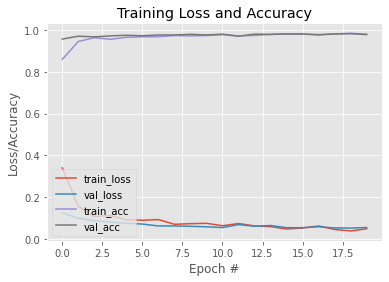

In [25]:
# plot the training loss and accuracy graphs of training and validation 
N = epochs
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), hist.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), hist.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), hist.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), hist.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
